In [9]:

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


class Neural_Network(object):
    def __init__(self):
        #Define Parameters
        self.inputLayerSize = 2
        self.outputLayerSize=1
        self.hiddenLayerSize=3
        
        #Define Weights
        self.W1=np.random.rand(self.inputLayerSize,self.hiddenLayerSize)
        self.W2=np.random.rand(self.hiddenLayerSize,self.outputLayerSize)

    def forward(self,X):
        #Propagate inputs through network
        self.z2 = np.dot(X,self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2,self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat
    
    def sigmoid(self, z):
        #Apply Sigmoid Activation Function
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Derivative of Sigmoid Function
        return np.exp(-z)/((1+np.exp(-z))**2)

    
    def costFunction(self, X, y):
        #Compute Cost Function with weights already stored in class
        self.yHat=self.forward(X)
        J=0.5*sum((y-self.yHat)**2)
        return J
    
    def costFunctionPrime(self, X, y):
        #Compute derivatives with respect to W1 and W2
        self.yHat=self.forward(X)
        delta3 = np.multiply(-(y-self.yHat),self.sigmoidPrime(self.z3))
        dJdW2=np.dot(self.a2.T,delta3)
        delta2=np.dot(delta3,self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1=np.dot(X.T,delta2)
        return dJdW1,dJdW2

X=np.array(([3,5],[5,1],[10,1]),dtype=float)
y=np.array(([75],[80],[93]),dtype=float)

#standardizing the data
X=X/np.amax(X,axis=0)
y=y/100

#initializing Neural Network 
NN1=Neural_Network()

yH=NN1.forward(X)

accuracyThreshold = 0.01

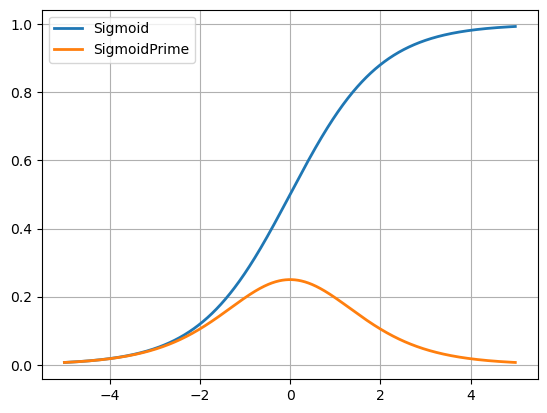

In [10]:
testValues=np.arange(-5,5,0.01)
plt.plot(testValues,NN1.sigmoid(testValues),linewidth=2)
plt.plot(testValues, NN1.sigmoidPrime(testValues),linewidth=2)
plt.grid(1)
plt.legend(['Sigmoid','SigmoidPrime'])


In [11]:
NN1=Neural_Network()

cost1=NN1.costFunction(X,y)

dJdW1,dJdW2=NN1.costFunctionPrime(X,y)

In [12]:
scalar=1
NN1.W1 = NN1.W1+scalar*dJdW1
NN1.W2 = NN1.W2+scalar*dJdW2
cost2 = NN1.costFunction(X,y)
print (cost1,cost2)

[0.09856642] [0.1452576]


In [13]:
scalar=0.1
NN1.W1 = NN1.W1-scalar*dJdW1
NN1.W2 = NN1.W2-scalar*dJdW2
cost3 = NN1.costFunction(X,y)
print (cost2,cost3)

[0.1452576] [0.14011199]


1.2 First Problem. Understand the structure of a neural network.100
Points

a. Plot the cost vs iteration 

In [14]:
#implement the Neural Network class as was given in the base code

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


class Neural_Network(object):
    def __init__(self):
        #Define Parameters
        self.inputLayerSize = 2
        self.outputLayerSize=1
        self.hiddenLayerSize=3
        
        #Define Weights
        self.W1=np.random.rand(self.inputLayerSize,self.hiddenLayerSize)
        self.W2=np.random.rand(self.hiddenLayerSize,self.outputLayerSize)

    def forward(self,X):
        #Propagate inputs through network
        self.z2 = np.dot(X,self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2,self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat
    
    def sigmoid(self, z):
        #Apply Sigmoid Activation Function
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Derivative of Sigmoid Function
        return np.exp(-z)/((1+np.exp(-z))**2)

    
    def costFunction(self, X, y):
        #Compute Cost Function with weights already stored in class
        self.yHat=self.forward(X)
        J=0.5*sum((y-self.yHat)**2)
        return J
    
    def costFunctionPrime(self, X, y):
        #Compute derivatives with respect to W1 and W2
        self.yHat=self.forward(X)
        delta3 = np.multiply(-(y-self.yHat),self.sigmoidPrime(self.z3))
        dJdW2=np.dot(self.a2.T,delta3)
        delta2=np.dot(delta3,self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1=np.dot(X.T,delta2)
        return dJdW1,dJdW2
    

In [15]:
#imports the time function so we can use it to measure the amount of time it takes the neural network to evaluate



import time
start = time.time()
NN = Neural_Network()
scalar = 1
target_acc = 0.001
cost_list = []
iter_list = range(1, 100)
for iter_list in iter_list:
    dJdW1, dJdW2 = NN.costFunctionPrime(X, y)
    NN.W1 = NN.W1 - scalar* dJdW1
    NN.W2 = NN.W2 - scalar* dJdW2
    cost_value = NN.costFunction(X, y)
    cost_list.append(cost_value)
    if cost_value <= target_acc:
        break

#initialize the Neural Network 
#The scalar is the learning rate. As you iterate through the range, the code continually calculates the 
#derivative which allows us to find the lowest cost value

end = time.time()
var1 = end - start

array([[0.01296819],
       [0.01194026],
       [0.01116376],
       [0.01056834],
       [0.01010571],
       [0.00974195],
       [0.00945279],
       [0.00922059],
       [0.00903233],
       [0.00887827],
       [0.00875105],
       [0.00864502],
       [0.00855586],
       [0.00848019],
       [0.00841536],
       [0.00835929],
       [0.00831032],
       [0.00826713],
       [0.00822867],
       [0.00819408],
       [0.00816266],
       [0.00813387],
       [0.00810725],
       [0.00808242],
       [0.00805908],
       [0.00803699],
       [0.00801592],
       [0.00799572],
       [0.00797624],
       [0.00795736],
       [0.007939  ],
       [0.00792107],
       [0.0079035 ],
       [0.00788624],
       [0.00786924],
       [0.00785247],
       [0.00783589],
       [0.00781947],
       [0.00780319],
       [0.00778704],
       [0.00777099],
       [0.00775504],
       [0.00773917],
       [0.00772337],
       [0.00770764],
       [0.00769196],
       [0.00767634],
       [0.007

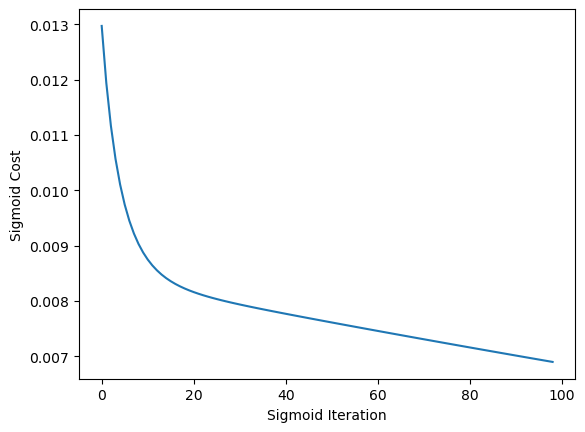

In [16]:
plt.xlabel("Sigmoid Iteration")
plt.ylabel("Sigmoid Cost")
plt.plot(np.arange(len(cost_list)), cost_list)
np.sort(cost_list)

This is the implementation of the comparison of the cost v iteration usuing the sigmoid activation function

b. Explore what happens if the learning rate is
unusually large.


In [17]:
#imports the time function so we can use it to measure the amount of time it takes the neural network to evaluate



import time
start = time.time()
NN = Neural_Network()
scalar = 50
target_acc = 0.001
cost_list = []
iter_list = range(1, 300)
for iter_list in iter_list:
    dJdW1, dJdW2 = NN.costFunctionPrime(X, y)
    NN.W1 = NN.W1 - scalar* dJdW1
    NN.W2 = NN.W2 - scalar* dJdW2
    cost_value = NN.costFunction(X, y)
    cost_list.append(cost_value)
    if cost_value <= target_acc:
        break

#initialize the Neural Network 
#The scalar is the learning rate. As you iterate through the range, the code continually calculates the 
#derivative which allows us to find the lowest cost value

end = time.time()
var1 = end - start

array([[0.04991513],
       [0.04861557],
       [0.04630866],
       [0.04159331],
       [0.03028035],
       [0.00900384],
       [0.0107766 ],
       [0.02403737],
       [0.00609003],
       [0.00845743],
       [0.01375962],
       [0.03464554],
       [0.01426596],
       [0.00523964],
       [0.00895698],
       [0.00549668],
       [0.00873391],
       [0.00458577],
       [0.00610308],
       [0.00424859],
       [0.00530908],
       [0.00402381],
       [0.00490887],
       [0.00391685],
       [0.00478803],
       [0.00390343],
       [0.00484907],
       [0.00394768],
       [0.00500454],
       [0.00400778],
       [0.00516671],
       [0.00405049],
       [0.00527349],
       [0.00406553],
       [0.00531563],
       [0.00406178],
       [0.00532125],
       [0.00405205],
       [0.00531978],
       [0.0040438 ],
       [0.00532474],
       [0.00403847],
       [0.00533621],
       [0.00403441],
       [0.00534906],
       [0.00402962],
       [0.00535891],
       [0.004

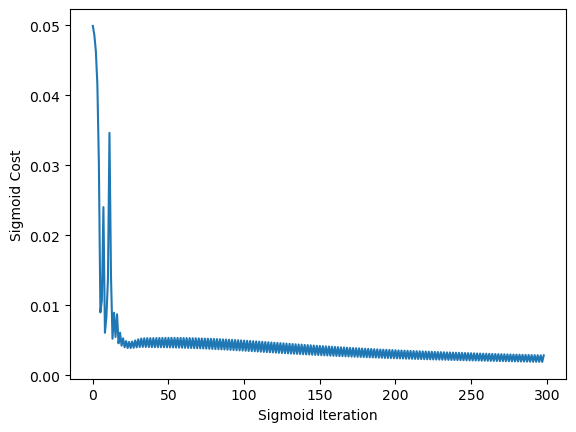

In [18]:
plt.xlabel("Sigmoid Iteration")
plt.ylabel("Sigmoid Cost")
plt.plot(np.arange(len(cost_list)), cost_list)
np.sort(cost_list)

We see that using a larger learnign rate can often skip over the optimal solution. It is best to have a smaller scaler, a smaller learning rate so that the algorithm can converge

1.3 Second Problem. 

Use ReLu instead of sigmoid activation. 50 Points

Use the ReLu activation function instead of the sigmoid function to construct a neural net of the same dimensions used in 1.2.

In [19]:
#Implenent the given base code, but instead create a neural net that 
#uses ReLu rather than the Sigmoid function for activation. 

class Neural_Network_ReLu(object):
    def __init__(self):
        #Define Parameters
        self.inputLayerSize = 2
        self.outputLayerSize=1
        self.hiddenLayerSize=3
        
        #Define Weights
        self.W1=np.random.rand(self.inputLayerSize,self.hiddenLayerSize)
        self.W2=np.random.rand(self.hiddenLayerSize,self.outputLayerSize)

    
    def relu(self, z):
        return np.maximum(0, z)
    
    def reluPrime(self,z):
        return 1 * (z > 0)
    
    def forward_withReLu(self,X):
        #Propagate inputs through network using the ReLu function instead of sigmoid
        self.z2 = np.dot(X,self.W1)
        self.a2 = self.relu(self.z2)
        self.z3 = np.dot(self.a2,self.W2)
        yHat = self.relu(self.z3)
        return yHat
   
    def costFunction_withReLu(self, X, y):
        #Compute Cost Function with weights already stored in class using ReLu function
        self.yHat=self.forward_withReLu(X)
        J=0.5*sum((y-self.yHat)**2)
        return J
   
    def costFunction_withReLu_Prime(self, X, y):
        #Compute derivatives with respect to W1 and W2
        self.yHat=self.forward_withReLu(X)
        delta3 = np.multiply(-(y-self.yHat),self.reluPrime(self.z3))
        dJdW2=np.dot(self.a2.T,delta3)
        delta2=np.dot(delta3,self.W2.T)*self.reluPrime(self.z2)
        dJdW1=np.dot(X.T,delta2)
        return dJdW1,dJdW2 

In [24]:
#doing the same process as the previous question, but this time impletmenting 
#the ReLu function and all of its corresponding other functions

start = time.time()
NNRL = Neural_Network_ReLu()
scalar = 1
target_acc = 0.001
cost_list = []
iter_list = range(1, 100)
for iter_list in iter_list:
    dJdW1, dJdW2 = NNRL.costFunction_withReLu_Prime(X, y)
    NN.W1 = NNRL.W1 - scalar* dJdW1
    NN.W2 = NNRL.W2 - scalar* dJdW2
    cost_value = NNRL.costFunction_withReLu(X, y)
    cost_list.append(cost_value)
    if cost_value <= target_acc:
        break

#The scalar is the learning rate. As you iterate through the range, the code continually calculates the 
#derivative which allows us to find the lowest cost value

end = time.time()
var1 = end - start

array([[1.37760575],
       [1.37760575],
       [1.37760575],
       [1.37760575],
       [1.37760575],
       [1.37760575],
       [1.37760575],
       [1.37760575],
       [1.37760575],
       [1.37760575],
       [1.37760575],
       [1.37760575],
       [1.37760575],
       [1.37760575],
       [1.37760575],
       [1.37760575],
       [1.37760575],
       [1.37760575],
       [1.37760575],
       [1.37760575],
       [1.37760575],
       [1.37760575],
       [1.37760575],
       [1.37760575],
       [1.37760575],
       [1.37760575],
       [1.37760575],
       [1.37760575],
       [1.37760575],
       [1.37760575],
       [1.37760575],
       [1.37760575],
       [1.37760575],
       [1.37760575],
       [1.37760575],
       [1.37760575],
       [1.37760575],
       [1.37760575],
       [1.37760575],
       [1.37760575],
       [1.37760575],
       [1.37760575],
       [1.37760575],
       [1.37760575],
       [1.37760575],
       [1.37760575],
       [1.37760575],
       [1.377

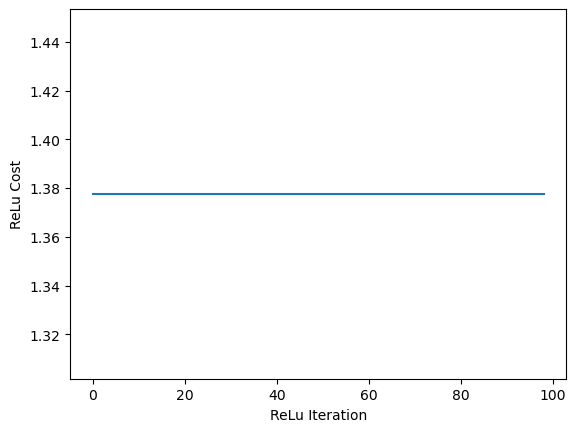

In [25]:
plt.xlabel("ReLu Iteration")
plt.ylabel("ReLu Cost")
plt.plot(np.arange(len(cost_list)), cost_list)
np.sort(cost_list)



b. Compare how fast this neural network works with the
one that uses the sigmoid function activation.

The ReLu function plateus. It takes less iterations, but doesn't every suggest a good minimization cost after the network has run. The sigmoid function took longer, but it minimozes the cost.

c. Add a new hidden layer and compare with
the previous network.

In [22]:
#define a new class with an extra hidden layer

#implement the Neural Network class as was given in the base code


class Neural_Network_Sigmoid_ExtraLayer(object):
    def __init__(self):
        #Define Parameters
        self.inputLayerSize = 2
        self.outputLayerSize=1
        self.hiddenLayerSize=3
        self.hiddenLayer2Size = 3
        
        #Define Weights
        self.W1 = np.random.rand(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.rand(self.hiddenLayerSize,self.outputLayerSize)
        self.W3 = np.random.rand(self.hiddenLayer2Size, self.outputLayerSize)

    def forward(self,X):
        #Propagate inputs through network
        #two additional lines needed for propogating through the additional hidden layer
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
         
        self.a3 = self.sigmoid(self.z3)
        self.z4 = np.dot(self.a3, self.W3)

        yHat = self.sigmoid(self.z4)
        return yHat
    
    def sigmoid(self, z):
        #Apply Sigmoid Activation Function
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Derivative of Sigmoid Function
        return np.exp(-z)/((1+np.exp(-z))**2)

    
    def costFunction(self, X, y):
        #Compute Cost Function with weights already stored in class
        self.yHat=self.forward(X.T)
        J=0.5*sum((y-self.yHat)**2)
        return J
    
  

    def costFunctionPrime(self, X, y):
        #Compute derivatives with respect to W1 and W2 and W3
        #additional lines here to account for the new W3
        self.yHat=self.forward(X)
        delta4 = np.multiply(-(y - self.yHat), self.sigmoidPrime(self.z4))
        dJdW3 = np.dot(self.a3.T, delta4)
        delta3 = np.dot(sleta4, self.W3.T) * self.sigmoidPrime(self.z3)
        dJdW2=np.dot(self.a2.T,delta3)
        delta2=np.dot(delta3,self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1=np.dot(X.T,delta2)
        return dJdW1,dJdW2, dJdW3
    

In [30]:
import time
start = time.time()
NN = Neural_Network_Sigmoid_ExtraLayer()
scalar = 1
target_acc = 0.001
cost_list = []
iter_list = range(1, 100)
for iter_list in iter_list:
    dJdW1, dJdW2, dJdW3 = NN.costFunctionPrime(X, y) 
    NN.W1 = NN.W1 - scalar* dJdW1
    NN.W2 = NN.W2 - scalar* dJdW2
    NN.W3 = NN.w3 - scalar * dJdW3
    cost_value = NN.costFunction(X, y)
    cost_list.append(cost_value)
    if cost_value <= target_acc:
        break

#initialize the Neural Network 
#The scalar is the learning rate. As you iterate through the range, the code continually calculates the 
#derivative which allows us to find the lowest cost value

end = time.time()
var1 = end - start

ValueError: shapes (3,1) and (3,1) not aligned: 1 (dim 1) != 3 (dim 0)

In [ ]:
plt.xlabel("Sigmoid Iteration")
plt.ylabel("Sigmoid Cost")
plt.plot(np.arange(len(cost_list)), cost_list)
np.sort(cost_list)

In [28]:


neuralNet = Neural_Network_Sigmoid_ExtraHiddenLayer()

scalar = 0.1
cost_values_sigmoid = []
iterations_sigmoid_extra = 0
initial_cost = neuralNet.costFunction(X, y)
cost_val = initial_cost
while (cost_val > accuracyThreshold):
    # compute the cost function with current iteration's version of the neural network
    cost_val = neuralNet.costFunction(X, y)
    # appending the cost_val found to the cost_values list to be used for plotting later
    cost_values_sigmoid.append(cost_val[0])

    # change the neural network's weights to "back propagate" and improve accuracy, 
    # using costFunctionPrime
    dCostdW1, dCostdW2, dCostdW3 = neuralNet.costFunctionPrime(X, y)
    neuralNet.W1 = neuralNet.W1 - (scalar * dCostdW1)
    neuralNet.W2 = neuralNet.W2 - (scalar * dCostdW2)
    neuralNet.W3 = neuralNet.W3 - (scalar * dCostdW3)
    iterations_sigmoid_extra += 1

NameError: name 'Neural_Network_Sigmoid_ExtraHiddenLayer' is not defined

In [29]:
iterations = np.arange(iterations_sigmoid_extra)
plt.plot(iterations, cost_values_sigmoid, linewidth = 2, color = 'seagreen')
plt.xlabel('Iteration')
plt.ylabel('Cost')

NameError: name 'iterations_sigmoid_extra' is not defined